<a href="https://colab.research.google.com/github/luanakwon/2021-2_ML/blob/main/University_Admissions_withTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree - manning  
---
2021 ML course by Prof. Kim Han gyu

In [ ]:
!pip install turicreate
!git clone https://github.com/luisguiserrano/manning.git
%cd 'manning/Chapter_9_Decision_Trees'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import utils
import turicreate as tc
from turicreate import decision_tree_classifier as DTC
np.random.seed(0)

# The dataset

In [ ]:
data = tc.SFrame('Admission_Predict.csv')
data

Read 100 lines. Lines per second: 2666.74

Finished parsing file /content/manning/Chapter_9_Decision_Trees/Admission_Predict.csv

Parsing completed. Parsed 100 lines in 0.037597 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,float,float,float,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/manning/Chapter_9_Decision_Trees/Admission_Predict.csv

Parsing completed. Parsed 400 lines in 0.012862 secs.

Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.0,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.8
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.9
7,321,109,3,3.0,4.0,8.2,1,0.75
8,308,101,2,3.0,4.0,7.9,0,0.68
9,302,102,1,2.0,1.5,8.0,0,0.5
10,323,108,3,3.5,3.0,8.6,0,0.45


In [ ]:
data['Admitted'] = data['Chance of Admit'] >= 0.75

In [ ]:
data.remove_column('Serial No.',inplace=True)
data.remove_column('Chance of Admit',inplace=True)

In [ ]:
data

GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
337,118,4,4.5,4.5,9.65,1,1
324,107,4,4.0,4.5,8.87,1,1
316,104,3,3.0,3.5,8.0,1,0
322,110,3,3.5,2.5,8.67,1,1
314,103,2,2.0,3.0,8.21,0,0
330,115,5,4.5,3.0,9.34,1,1
321,109,3,3.0,4.0,8.2,1,1
308,101,2,3.0,4.0,7.9,0,0
302,102,1,2.0,1.5,8.0,0,0
323,108,3,3.5,3.0,8.6,0,0


In [ ]:
features = data.remove_column('Admitted')
labels = data['Admitted']

In [ ]:
features

GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
337,118,4,4.5,4.5,9.65,1
324,107,4,4.0,4.5,8.87,1
316,104,3,3.0,3.5,8.0,1
322,110,3,3.5,2.5,8.67,1
314,103,2,2.0,3.0,8.21,0
330,115,5,4.5,3.0,9.34,1
321,109,3,3.0,4.0,8.2,1
308,101,2,3.0,4.0,7.9,0
302,102,1,2.0,1.5,8.0,0
323,108,3,3.5,3.0,8.6,0


In [ ]:
labels

dtype: int
Rows: 400
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ... ]

# Training a decision tree

In [ ]:
dt = DTC.create(data,'Admitted',validation_set=None,max_depth=None)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 400

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.002842     | 0.955000          | 0.256310          |

+-----------+--------------+-------------------+-------------------+

In [ ]:
dt.predict(features[0:5])

<class 'turicreate.data_structures.sarray.SArray'>


In [ ]:
wrong = labels - dt.predict(features)
print(1 - np.mean(np.abs(wrong.to_numpy())))

0.955


In [ ]:
# utils.display_tree(dt)

# Training a smaller tree that doesn't overfit

In [ ]:
dt_smaller = DTC.create(data,'Admitted',validation_set=None,max_depth=3)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 400

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.002507     | 0.887500          | 0.317772          |

+-----------+--------------+-------------------+-------------------+

In [ ]:
wrong = labels - dt_smaller.predict(features)
print(1 - np.mean(np.abs(wrong.to_numpy())))

0.8875


In [ ]:
utils.display_tree(dt_smaller)

### Using the tree to make predictions

In [ ]:
example = tc.SFrame({'GRE Score':[320],	
                     'TOEFL Score':[110],	
                     'University Rating':[3],	
                     'SOP':[4.0],	
                     'LOR':[3.5],	
                     'CGPA':[8.9],
                     'Research':[0],	
                     'Admitted':[0]})

dt_smaller.predict(example)

dtype: int
Rows: 1
[1]

In [ ]:
#???
example = tc.SFrame({'GRE Score':[320],	
                     'TOEFL Score':[110],	
                     'University Rating':[3],	
                     'SOP':[4.0],	
                     'LOR':[3.5],	
                     'CGPA':[8.0],
                     'Research':[0],	
                     'Admitted':[0]})

dt_smaller.predict(example)

dtype: int
Rows: 1
[1]

# Training a decision tree with only two features

In [ ]:
#exams = data[['GRE Score', 'CGPA']]
data_exam = data[['GRE Score', 'TOEFL Score','Admitted']]
exams = data[['GRE Score', 'TOEFL Score']]
exams

GRE Score,TOEFL Score
337,118
324,107
316,104
322,110
314,103
330,115
321,109
308,101
302,102
323,108


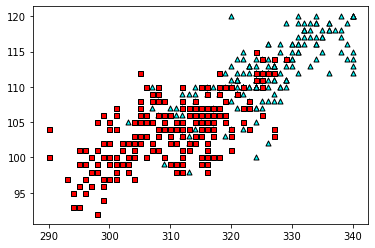

In [ ]:
utils.plot_points(exams.to_numpy(), labels.to_numpy(), size_of_points=25)

### Fitting a tree of depth 2

In [ ]:
#dt_exams = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)
dt_exams = DTC.create(data_exam,'Admitted',validation_set=None,max_depth=2)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 400

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.002528     | 0.862500          | 0.392581          |

+-----------+--------------+-------------------+-------------------+

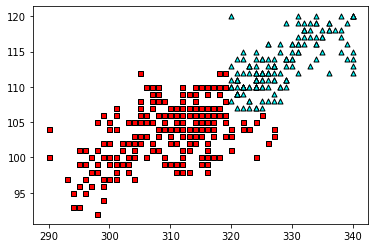

In [ ]:
preds = dt_exams.predict(data_exam)
# utils.plot_points(exams.to_numpy(), labels.to_numpy(), size_of_points=25)
utils.plot_points(exams.to_numpy(), preds.to_numpy(), size_of_points=25)

In [ ]:
# utils.display_tree(dt_exams)

### Fitting a tree of depth 1

In [ ]:
simpler_dt_exams = dt_exams = DTC.create(data_exam,'Admitted',validation_set=None,max_depth=1)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 400

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.002045     | 0.852500          | 0.427724          |

+-----------+--------------+-------------------+-------------------+

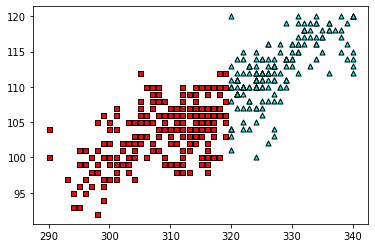

In [ ]:
preds = simpler_dt_exams.predict(data_exam)
utils.plot_points(exams.to_numpy(), preds.to_numpy(), size_of_points=25)

In [ ]:
# utils.display_tree(simpler_dt_exams)

### Fitting a tree of unbounded depth (overfitting)

In [ ]:
crazy_dt_exams = DecisionTreeClassifier()
crazy_dt_exams.fit(exams, labels)

In [ ]:
utils.plot_model(exams, labels, crazy_dt_exams, size_of_points=25)

In [ ]:
utils.display_tree(crazy_dt_exams)